In [1]:
# import libraries
from DNN.wave_multiplex import Manager
from models.wave_multiplex import D2NNmodel
from helper import *

In [2]:
n_layers = 6
n_multiplexing = 8
binning_factor = 4
n_size_per_layer = 140
distance_constant = 0.03
pixel_pitch = 400e-6
lambd_mean = 0.8e-3
lambd_op = 0.9125 * lambd_mean
lambd_ed = 1.0875 * lambd_mean 
n_padding = 70
lr = 1e-3
batch_size = 16
whether_load_model = False
load_model_name = 'saved_model/07_21_2024.pth'
n_dataset_per_wavelength = 15_000
input_fov = 8
fov_padd = 54
output_fov = input_fov
hmin = 0.25 * lambd_mean
hmax = 1.5 * lambd_mean
bit_depth = 8
transform_dimension = (input_fov * input_fov)
lambd_list = np.linspace(lambd_op,lambd_ed,n_multiplexing)
device = "cuda" if torch.cuda.is_available() else "cpu"

In [3]:
torch.manual_seed(42)
A, tr_dataloaders , te_dataloaders\
    = loader_list_generation(n_dataset_per_wavelength, n_multiplexing, input_fov, batch_size)
# fig = plot_cosine_similarity_matrix(A)

In [4]:
model = D2NNmodel(pixel_pitch, distance_constant, n_padding, device, lambd_list, n_size_per_layer, 0, input_fov, binning_factor)
loss_fn = mse_loss()
optimizer = optim.Adam(model.parameters(), lr=lr)
manager = Manager(model, loss_fn, optimizer, n_multiplexing)
manager.set_loaders(tr_dataloaders, te_dataloaders)
# tracking, fig = manager.lr_range_test(train_dataloader, end_lr=1e-1, num_iter=100)
if whether_load_model:
    manager.load_checkpoint(load_model_name, None)

In [11]:
manager.train(6)

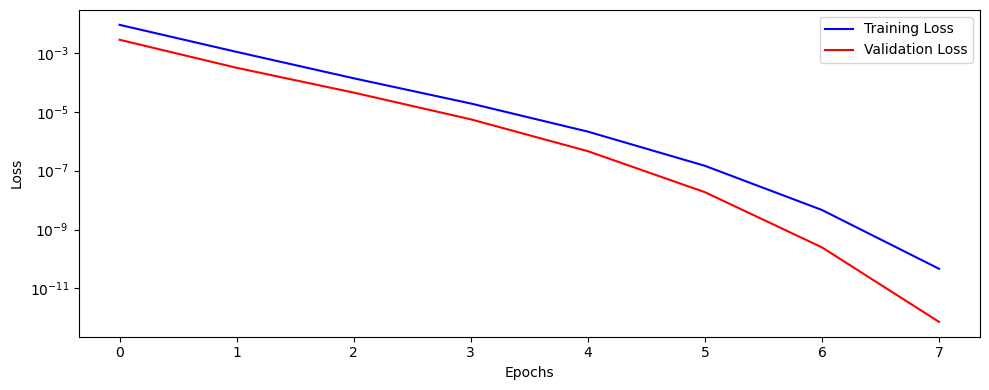

In [12]:
fig = manager.plot_losses()

In [16]:
# manager.save_checkpoint('saved_model/07_22_2024.pth')

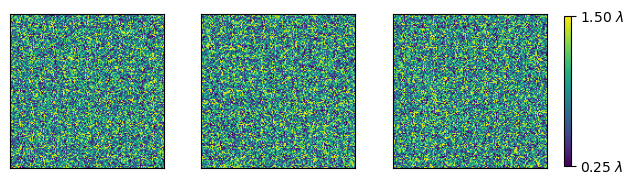

In [13]:
layers_name = ['modulation_1', 'modulation_2', 'modulation_3']
fig_mask_height = manager.visualize_height_mask(layers_name, hmin, hmax, bit_depth)

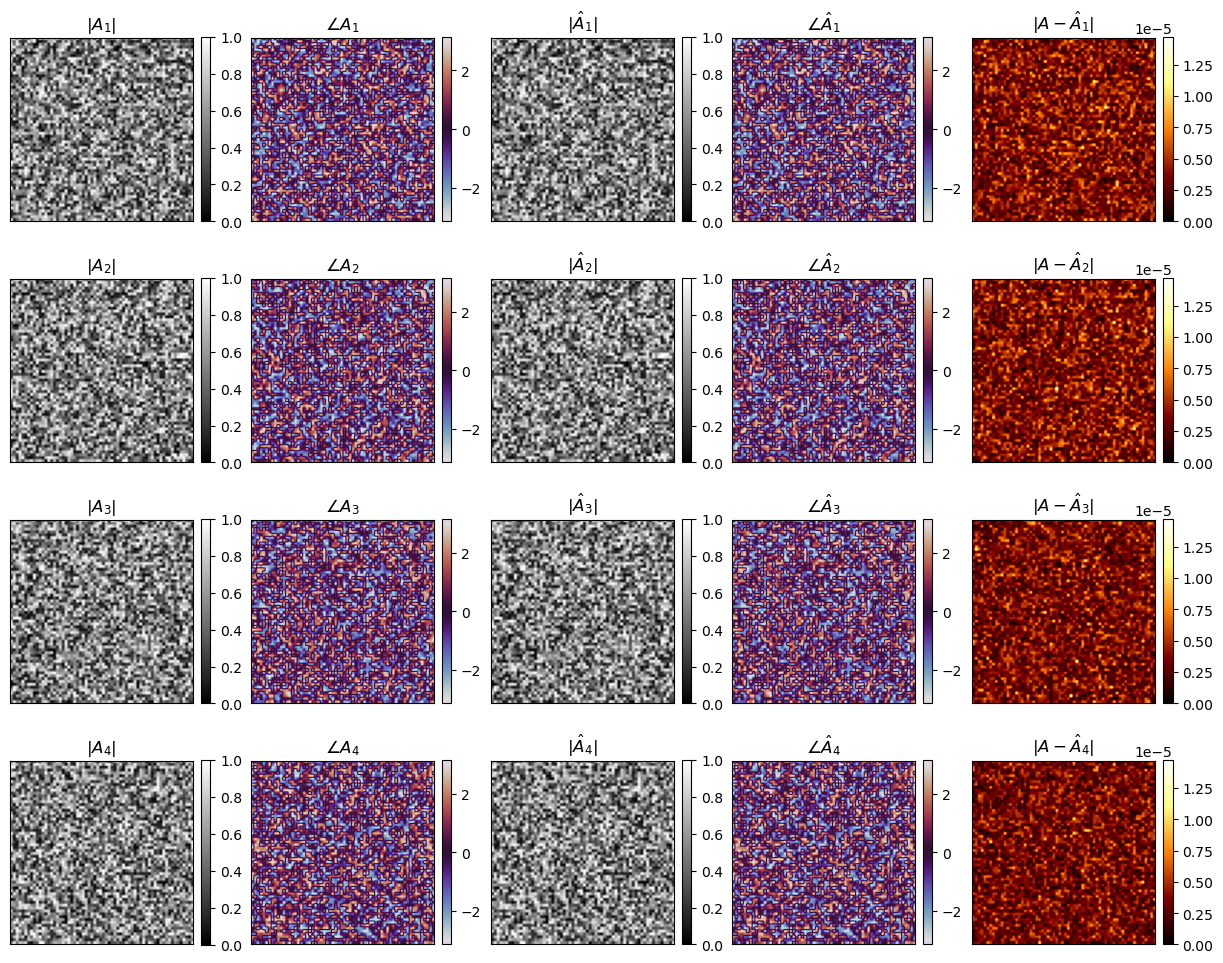

tensor(3.5741e-06)


In [14]:
# A_hat = manager.get_transform_tensor(A)
fig_1, mean_error = manager.figure_1(A)
print(mean_error)

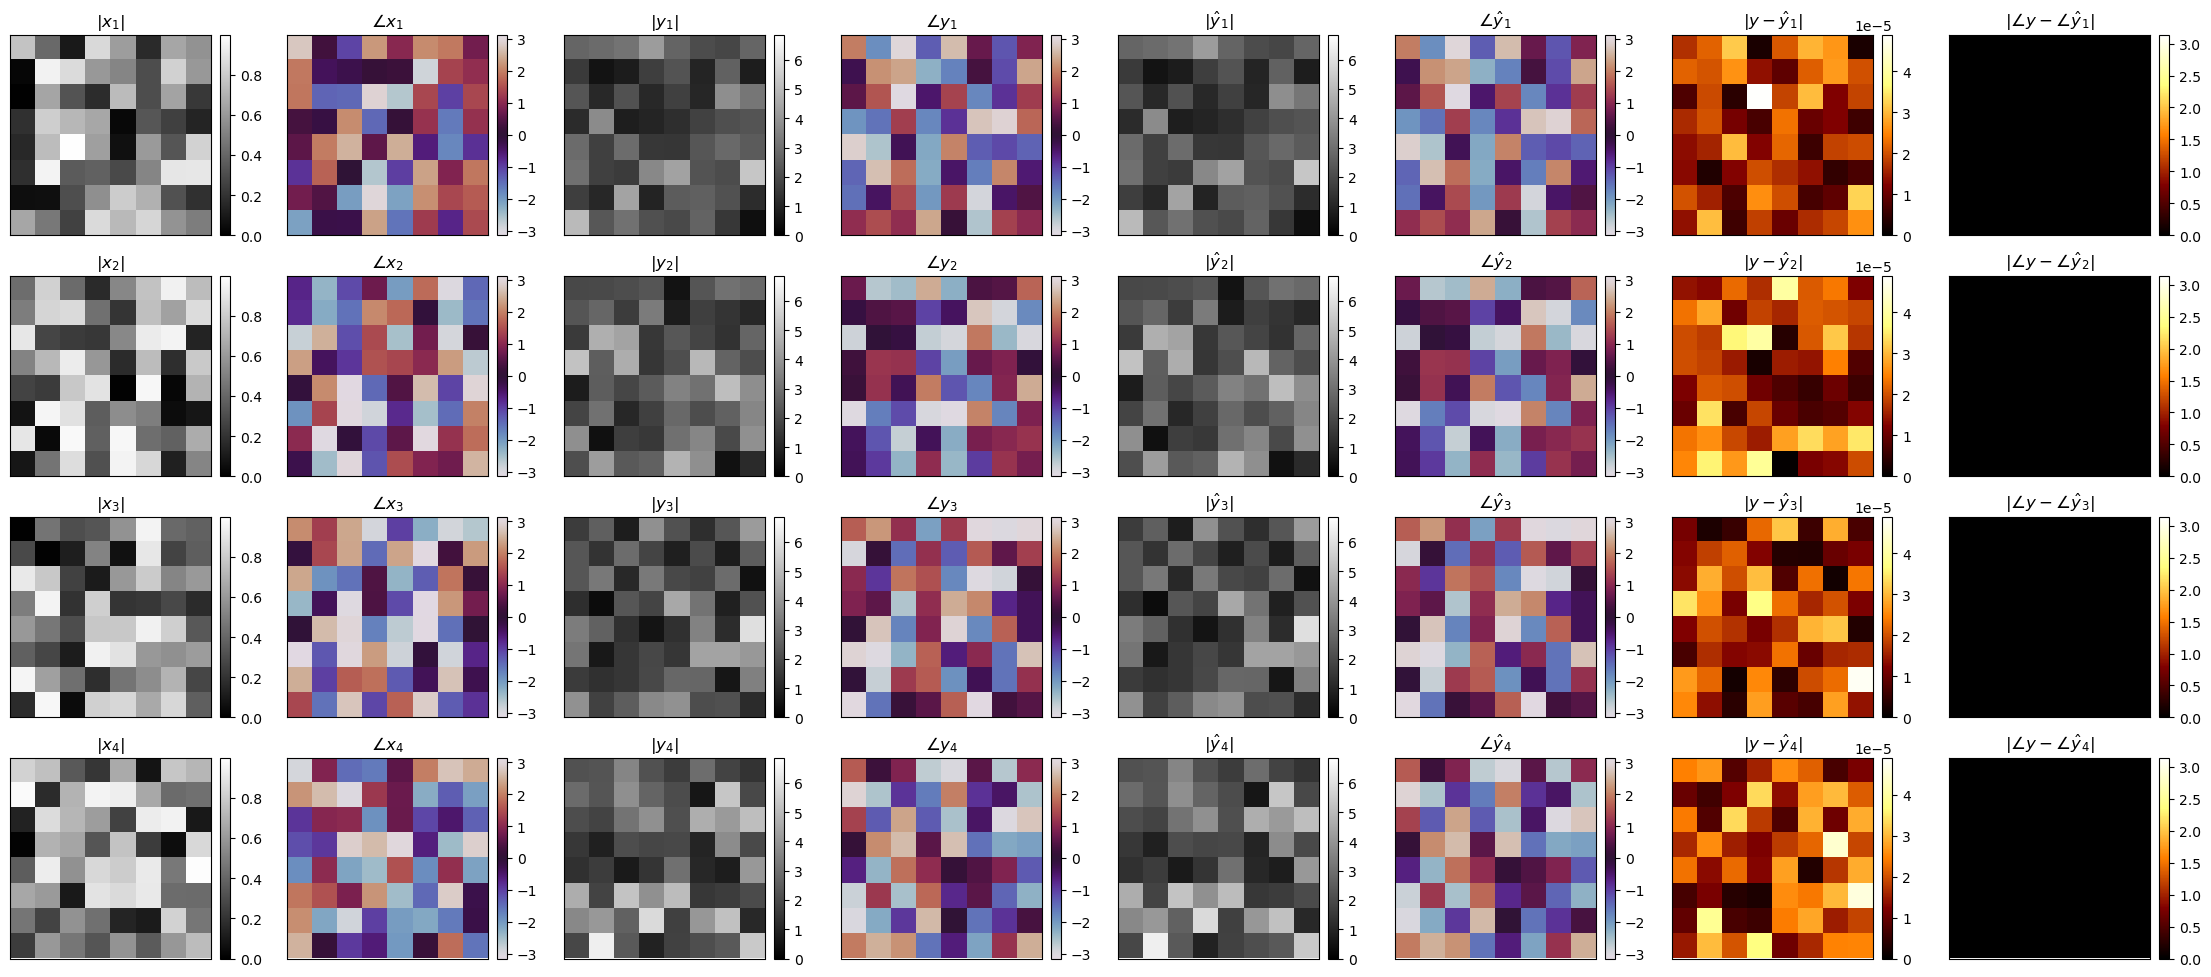

In [15]:
fig_2 = manager.figure_2()

In [ ]:
# To be continued ...